In [1]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

print(tf.__version__)

2.6.0


In [2]:
# define constants
batch_size = 128
epochs = 100
num_classes = 10

In [3]:
# download MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
len(train_images), len(test_images)

(60000, 10000)

In [6]:
len(train_images[0])

28

In [7]:
len(train_images[0][0])

28

In [ ]:
# normalize the input image so that each pixel value is between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# define the model architecture with CNN
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          # hidden layers
                          keras.layers.Reshape(target_shape=(28,28,1)),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.25), # Abandon some of them, to speed up execution and increase reliability
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# save the best model as digits_model.h5
filepath = '/model/digits_model.h5'
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True)

In [ ]:
# define a callback to monitor val_loss
monitor_earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[model_checkpoint, monitor_earlystop])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


469/469 [==============================] - 37s 11ms/step - loss: 0.2367 - accuracy: 0.9262 - val_loss: 0.0474 - val_accuracy: 0.9843
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0836 - accuracy: 0.9754 - val_loss: 0.0373 - val_accuracy: 0.9874
Epoch 3/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.0273 - val_accuracy: 0.9907
Epoch 4/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.0260 - val_accuracy: 0.9909
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0273 - val_accuracy: 0.9913
Epoch 6/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0243 - val_accuracy: 0.9918
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0245 - val_accuracy: 0.9921
Epo

In [ ]:
# download the digit classification model if you're using Colab
# or print the model's local path if you're not using Colab
def download(path):
  try:
    from google.colab import files
    files.download(path)
  except ImportError:
    import os
    print("Error Download: ", os.path.join(os,getcwd(),path))

In [ ]:
# download the digit classification
download(filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# save model
savefile = 'saved_digits.h5'
model.save(savefile)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0

In [ ]:
!ls -al

total 6332
drwxr-xr-x 1 root root    4096 May 31 07:55 .
drwxr-xr-x 1 root root    4096 May 31 07:54 ..
drwxr-xr-x 4 root root    4096 May  6 13:43 .config
drwxr-xr-x 1 root root    4096 May  6 13:44 sample_data
-rw-r--r-- 1 root root 6466496 May 31 07:56 saved_digits.h5


In [ ]:
# evaluate the model using test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0273 - accuracy: 0.9922
Test Accuracy:  0.9922000169754028


In [ ]:
# load model
load_model = keras.models.load_model(savefile)

In [ ]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0

In [ ]:
# evaluate the load model using test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Load Test Accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0273 - accuracy: 0.9922
Load Test Accuracy:  0.9922000169754028


In [ ]:
# Helper function to display digit images
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

# Helper function to display digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0
  digit_count = 0
  while digit_count < sample_count:
    i += 1
    if (digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()

# Helper function to display digit images
def show_digit_image(image):
  # dram digit image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  # major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  # and a correspoding grid
  ax.grid(which='both')
  # or if you want different settings for the grids
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)
  ax.imshow(image, cmap=plt.cm.binary)

  plt.show()

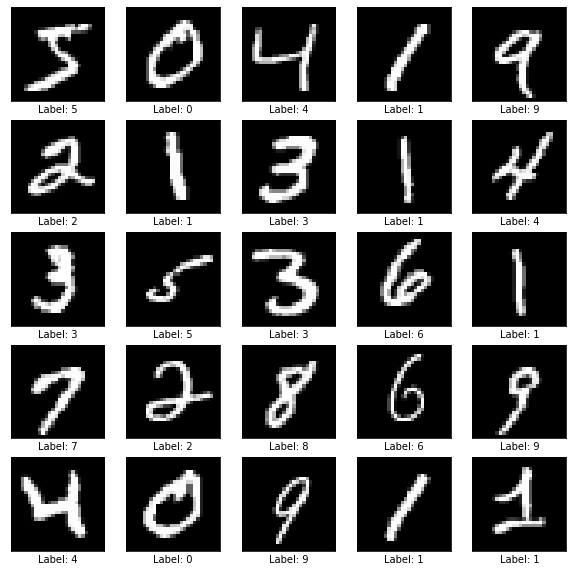

In [ ]:
# show the first 25 images
show_sample(train_images, ['Label: %s' % label for label in train_labels])

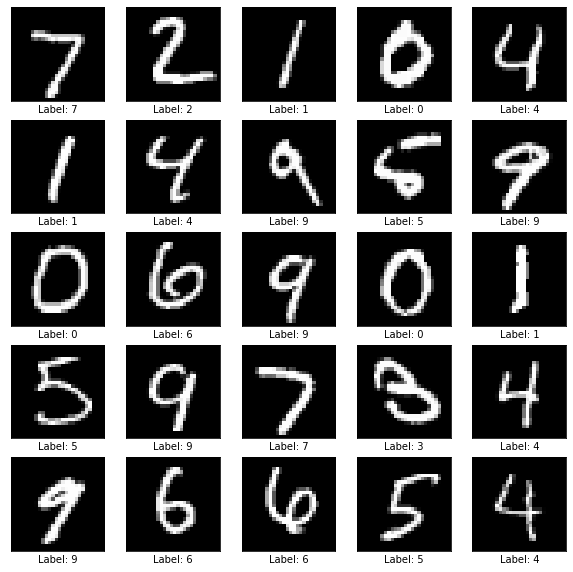

In [ ]:
# show the first 25 images
show_sample(test_images, ['Label: %s' % label for label in test_labels])

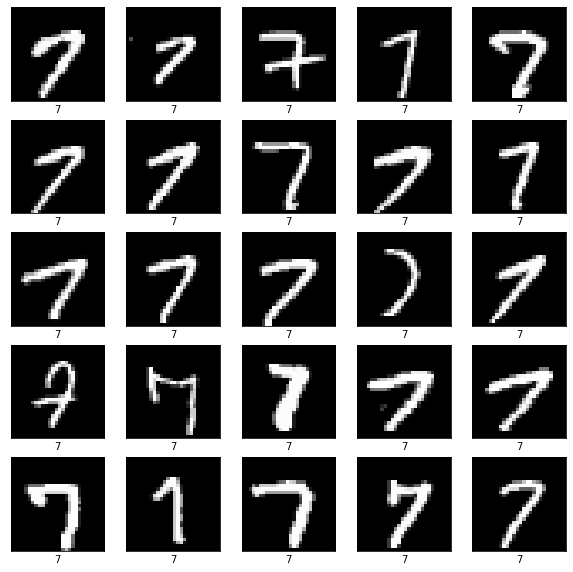

In [ ]:
# show digit 7 the first 25 images
show_sample_digit(train_images, train_labels, 7)

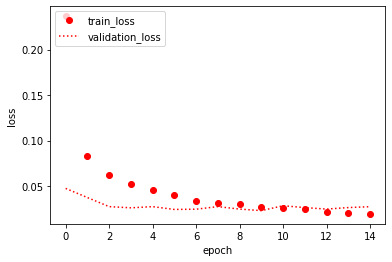

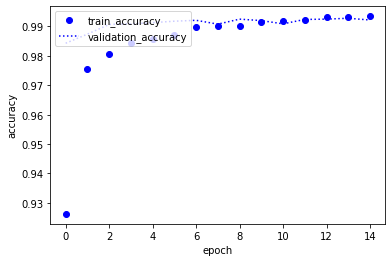

In [ ]:
# evaluate the model using test dataset - show performance
fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label="train_loss")
loss_ax.plot(history.history['val_loss'], 'r:', label="validation_loss")
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label="train_accuracy")
acc_ax.plot(history.history['val_accuracy'], 'b:', label="validation_accuracy")
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

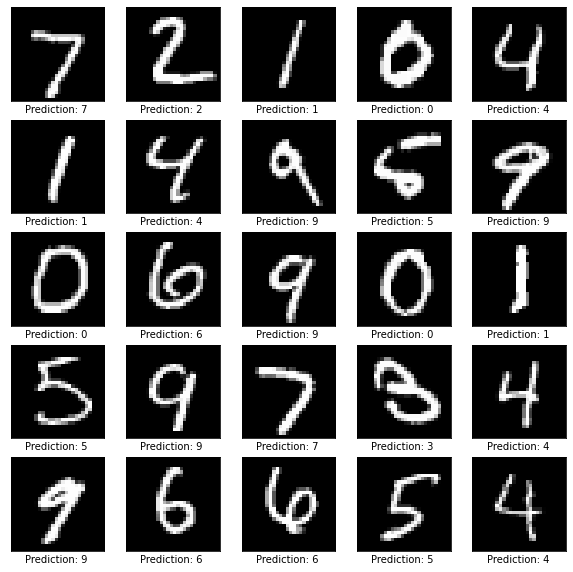

In [ ]:
# predict the labels of digit images in our test dataset
predictions = model.predict(test_images)

# then plot the first 25 test images and their predicted labels
show_sample(test_images, ['Prediction: %d ' % np.argmax(result) for result in predictions])

Number is :  7 


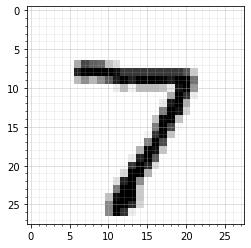

In [ ]:
digit = 1 #@param {type:"slider", min:1, max:10000, step:1}
selected_digit = digit - 1

result = predictions[selected_digit]
result_number = np.argmax(result)
print("Number is : %2d " % result_number)

show_digit_image(test_images[selected_digit])